In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
x_monthly = pd.read_csv('./data/x_monthly.csv', index_col='date')

x_monthly.index = pd.to_datetime(x_monthly.index).normalize()
x_monthly.head()

,spend,permits,permit_val,starts,completions,manufactured,new_for_sale,months_supply,emratio,pop_level,...,pm_save,consump_durable,new_sold,hp_idx,owner_vacancy,rent_vacancy,week_earning,delinquent_rate,hor,hp_idx_qtr
date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,353065,1277,9982.312,1268,1262.0,304,310,4.3,64.6,211410,...,358.9,908.6,873,100.552,1.600000,7.900000,603.000000,1.950000,67.100000,101.339333
2000-02-01,351933,1241,11363.143,1255,1326.0,291,305,4.3,64.6,211576,...,324.3,930.7,856,101.339,1.566667,7.933333,604.000000,1.956667,67.133333,102.117667
2000-03-01,353452,1253,15373.755,1313,1312.0,287,310,4.3,64.6,211772,...,311.8,923.3,900,102.127,1.533333,7.966667,605.000000,1.963333,67.166667,102.896000
2000-04-01,356188,1192,14128.141,1275,1307.0,271,299,4.4,64.7,212018,...,347.8,900.6,841,102.922,1.500000,8.000000,606.000000,1.970000,67.200000,103.674333
2000-05-01,349907,1182,15639.629,1230,1334.0,265,302,4.4,64.4,212242,...,351.1,907.0,857,103.677,1.533333,8.066667,607.666667,2.010000,67.366667,104.378222


### Remove Outliers

- In EDA, it was observed that the data for the year 2020 and later, is very different earlier data, it is fair to say that this outlying data has a different distribution.
- Which is due the pandemic, during which a lot of factors beyond the normal socio economic ones came into power.
- I've tried to train models for that period previously but have been unable to model the specific period.
- However the 2008 recession period is fairly captured in the models below.


- I'll restrict this analysis for the period of 2000-1-1 to 2019-12-1 based on data availability and above mentioned reasons.

In [3]:
x_monthly = x_monthly[:'2019-12-1'].reset_index()

y_monthly = x_monthly['hp_idx']

# drop date and target variables

x_monthly.drop(['date', 'hp_idx', 'hp_idx_qtr'], axis =1, inplace=True)

x_monthly.head()

,spend,permits,permit_val,starts,completions,manufactured,new_for_sale,months_supply,emratio,pop_level,...,fed_fund_rate,disp_income,pm_save,consump_durable,new_sold,owner_vacancy,rent_vacancy,week_earning,delinquent_rate,hor
0,353065,1277,9982.312,1268,1262.0,304,310,4.3,64.6,211410,...,3.99,9309.1,358.9,908.6,873,1.600000,7.900000,603.000000,1.950000,67.100000
1,351933,1241,11363.143,1255,1326.0,291,305,4.3,64.6,211576,...,5.79,9345.2,324.3,930.7,856,1.566667,7.933333,604.000000,1.956667,67.133333
2,353452,1253,15373.755,1313,1312.0,287,310,4.3,64.6,211772,...,5.78,9370.3,311.8,923.3,900,1.533333,7.966667,605.000000,1.963333,67.166667
3,356188,1192,14128.141,1275,1307.0,271,299,4.4,64.7,212018,...,6.17,9418.3,347.8,900.6,841,1.500000,8.000000,606.000000,1.970000,67.200000
4,349907,1182,15639.629,1230,1334.0,265,302,4.4,64.4,212242,...,6.17,9457.3,351.1,907.0,857,1.533333,8.066667,607.666667,2.010000,67.366667


In [4]:
y_monthly.head()

0    100.552
1    101.339
2    102.127
3    102.922
4    103.677
Name: hp_idx, dtype: float64

In [5]:
## split without shuffle to prevent leak

xm_train, xm_test, ym_train, ym_test = train_test_split(x_monthly, y_monthly, test_size=0.20, shuffle=False, stratify=None)

- In EDA it was seen that most of the features are not normally distributed, so I'll standardize data instead of normalizing it

In [6]:
## scale data

scaler = StandardScaler()
scaler.fit(xm_train)

xm_train_sc = scaler.transform(xm_train)
xm_test_sc = scaler.transform(xm_test)

### Linear Regression

In [7]:
### function for model evaluation

def evaluate(model, x_test, y_test):
    pred = model.predict(x_test)
    r2 = metrics.r2_score(y_test, pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))

    print(f"R2 score: {r2}")
    print(f"RMSE: {rmse}")
    
    print(f"RMSE / mean(house_price_index): {rmse/np.mean(y_test)}")
    print('\n')

In [8]:
lreg = LinearRegression()

lreg.fit(xm_train_sc, ym_train)

LinearRegression()

In [9]:
## evaluate
print('### On Train Data --->\n')

evaluate(lreg, xm_train_sc, ym_train)


print('### On Test Data --->\n')

evaluate(lreg, xm_test_sc, ym_test)

### On Train Data --->

R2 score: 0.9967094106780674
RMSE: 1.3507831805168402
RMSE / mean(house_price_index): 0.009206018044654677


### On Test Data --->

R2 score: 0.8639210146368353
RMSE: 4.3778716433424645
RMSE / mean(house_price_index): 0.022464714801548293




### Feature Elimination

- In EDA it was seen that there is high collinearity between featuers.
- However, simply removing features for high collinearity is not a good idea.


- I'll use linear regressor and examine the P-values of columns.


- Columns with high P-value (> 0.05) will be removed.


- I'll retrain the regressor with new data and repeat until we have no redundancy.


- At the same time it is important to look at the overall R2 score and Prob(F-statistic) for the model.


- I'll use statmodels OLS as its easier to see the summary

In [10]:
xm_train_df = pd.DataFrame(xm_train_sc, columns=xm_train.columns)

xm_test_df = pd.DataFrame(xm_test_sc, columns=xm_test.columns)

In [11]:
### print summary statistics for linear regressor

def fit_ols(x, y):
    # add intercept
    x_sm = sm.add_constant(x)

    # fit ordinary least squares
    lm = sm.OLS(y, x_sm).fit()

    # print stats
    print(lm.summary())
    return lm


### print vif

def print_vif(df):
    df_vif = pd.DataFrame()
    df_vif['Features'] = df.columns
    df_vif['VIF'] = [round(variance_inflation_factor(df.values, k), 2)
                  for k in range(df.shape[1])]

    print(df_vif.sort_values(by='VIF',ascending=False))


### drop cols

def drop_cols(cols, df):
    df.drop(cols, axis=1, inplace=True)


In [12]:
fit_ols(xm_train_df, ym_train)
print_vif(xm_train_df)

                            OLS Regression Results                            
Dep. Variable:                 hp_idx   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2451.
Date:                Tue, 23 Aug 2022   Prob (F-statistic):          1.64e-208
Time:                        22:40:10   Log-Likelihood:                -345.64
No. Observations:                 201   AIC:                             737.3
Df Residuals:                     178   BIC:                             813.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             146.7283      0.101   14

- Here the completions column has a high P-value, there is  ~95% chance that this feature does not contribute to our model.


- So I'll remove it, I'll proceed iteratively for other columns below.

In [13]:
drop_cols(['completions'], xm_train_df)

In [14]:
fit_ols(xm_train_df, ym_train)
print_vif(xm_train_df)

                            OLS Regression Results                            
Dep. Variable:                 hp_idx   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2582.
Date:                Tue, 23 Aug 2022   Prob (F-statistic):          3.20e-210
Time:                        22:43:54   Log-Likelihood:                -345.65
No. Observations:                 201   AIC:                             735.3
Df Residuals:                     179   BIC:                             808.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             146.7283      0.101   14

In [15]:
drop_cols(['manufactured'], xm_train_df)

In [16]:
fit_ols(xm_train_df, ym_train)
print_vif(xm_train_df)

                            OLS Regression Results                            
Dep. Variable:                 hp_idx   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2725.
Date:                Tue, 23 Aug 2022   Prob (F-statistic):          6.20e-212
Time:                        22:43:57   Log-Likelihood:                -345.68
No. Observations:                 201   AIC:                             733.4
Df Residuals:                     180   BIC:                             802.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             146.7283      0.101   14

In [17]:
drop_cols(['rent_vacancy'], xm_train_df)

In [18]:
fit_ols(xm_train_df, ym_train)
print_vif(xm_train_df)

                            OLS Regression Results                            
Dep. Variable:                 hp_idx   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2878.
Date:                Tue, 23 Aug 2022   Prob (F-statistic):          1.40e-213
Time:                        22:43:58   Log-Likelihood:                -345.90
No. Observations:                 201   AIC:                             731.8
Df Residuals:                     181   BIC:                             797.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             146.7283      0.101   14

In [19]:
drop_cols(['permit_val'], xm_train_df)

In [20]:
fit_ols(xm_train_df, ym_train)
print_vif(xm_train_df)

                            OLS Regression Results                            
Dep. Variable:                 hp_idx   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     3045.
Date:                Tue, 23 Aug 2022   Prob (F-statistic):          3.33e-215
Time:                        22:44:17   Log-Likelihood:                -346.22
No. Observations:                 201   AIC:                             730.4
Df Residuals:                     182   BIC:                             793.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             146.7283      0.100   14

In [21]:
drop_cols(['months_supply'], xm_train_df)

In [22]:
fit_ols(xm_train_df, ym_train)
print_vif(xm_train_df)

                            OLS Regression Results                            
Dep. Variable:                 hp_idx   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     3219.
Date:                Tue, 23 Aug 2022   Prob (F-statistic):          1.11e-216
Time:                        22:44:25   Log-Likelihood:                -346.94
No. Observations:                 201   AIC:                             729.9
Df Residuals:                     183   BIC:                             789.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             146.7283      0.100   14

In [23]:
drop_cols(['new_sold'], xm_train_df)

In [24]:
fit_ols(xm_train_df, ym_train)
print_vif(xm_train_df)

                            OLS Regression Results                            
Dep. Variable:                 hp_idx   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     3421.
Date:                Tue, 23 Aug 2022   Prob (F-statistic):          2.92e-218
Time:                        22:44:36   Log-Likelihood:                -347.44
No. Observations:                 201   AIC:                             728.9
Df Residuals:                     184   BIC:                             785.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             146.7283      0.100   14

### Training model on reduced columns

- After dropping all redundant columns, this model is trained on remaining ones.

- Below is the training summary statistics

In [25]:
drop_cols(['mortgage_rate'], xm_train_df)

In [26]:
lm = fit_ols(xm_train_df, ym_train)
print_vif(xm_train_df)

                            OLS Regression Results                            
Dep. Variable:                 hp_idx   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     3598.
Date:                Tue, 23 Aug 2022   Prob (F-statistic):          2.93e-219
Time:                        22:45:01   Log-Likelihood:                -349.42
No. Observations:                 201   AIC:                             730.8
Df Residuals:                     185   BIC:                             783.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             146.7283      0.101   14

- As we can see R2 and R2-adjusted values are close to the original values with all features.


- P-value for all featues < 0.05


- Prob(F-statistic) is very low, which is great, as it means our model is learning


- Condition No. is high, which suggests that data is multicollinear, also VIF values suggest the same!

__Evaluate on Test data__

In [41]:
xm_test_df1 = sm.add_constant(xm_test_df)  # add constant column

evaluate(lm, xm_test_df1, ym_test)

R2 score: 0.8997087122920078
RMSE: 3.7583662259612294
RMSE / mean(house_price_index): 0.01928576995042468




__Both test R2 scores and RMSE are better compared to the model trained with full features !__

## Impact of Features on House Prices

- We can use our regressor's summary to understand how the features affect home prices

In [43]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 hp_idx   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     3598.
Date:                Tue, 23 Aug 2022   Prob (F-statistic):          2.93e-219
Time:                        23:21:56   Log-Likelihood:                -349.42
No. Observations:                 201   AIC:                             730.8
Df Residuals:                     185   BIC:                             783.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             146.7283      0.101   1449.973      0.000     146.529     146.928
spend               7.0027      0.981      7.141      0.000       5.068       8.937
permits             5.3634      1.550      3.460      0.001       2.305       8.422
starts             -3.1141      1.139     -2.735      0.007      -5.360      -0.868
new_for_sale        9.9017      0.916     10.809      0.000       8.094      11.709
emratio             2.5841      0.986      2.620      0.010       0.638       4.530
pop_level          22.3097      2.431      9.176      0.000      17.513      27.106
gdp                -1.7224      0.257     -6.689      0.000      -2.230      -1.214
fed_fund_rate       1.1300      0.368      3.074      0.002       0.405       1.855
disp_income        16.1483      2.277      7.092      0.000      11.656      20.641
pm_save            -5.6673      0.651     -8.704      0.000      -6.952      -4.383
consump_durable    -2.1212      0.570     -3.721      0.000      -3.246      -0.996
owner_vacancy       1.1904      0.482      2.468      0.014       0.239       2.142
week_earning       -7.4877      2.108     -3.553      0.000     -11.646      -3.330
delinquent_rate     2.0741      0.853      2.430      0.016       0.390       3.758
hor                 1.6842      0.629      2.678      0.008       0.443       2.925
==============================================================================
Omnibus:                        0.554   Durbin-Watson:                   0.571
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.686
Skew:                          -0.061   Prob(JB):                        0.710
Kurtosis:                       2.741   Cond. No.                         95.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
coef = lm.params[1:]

coef = pd.DataFrame(coef).reset_index()

coef.columns = ['feature', 'weight']

coef

,feature,weight
0,spend,7.002745
1,permits,5.363447
2,starts,-3.114108
3,new_for_sale,9.901731
4,emratio,2.584129
5,pop_level,22.309653
6,gdp,-1.722372
7,fed_fund_rate,1.130036
8,disp_income,16.148343
9,pm_save,-5.667297


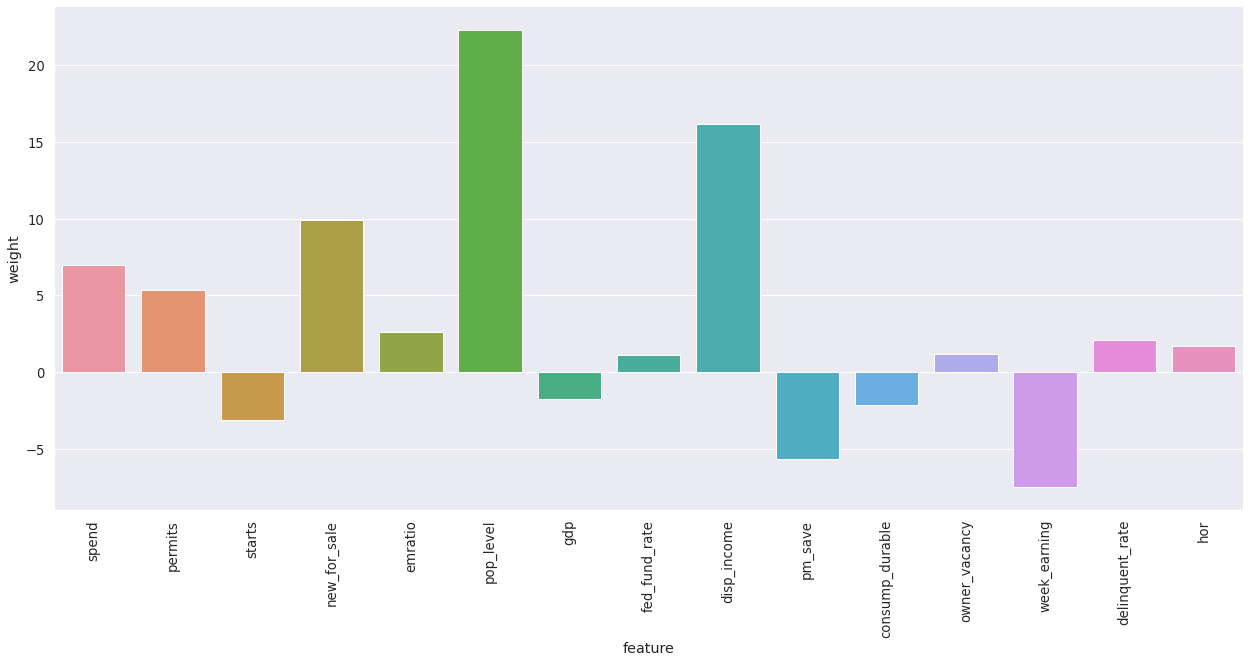

In [66]:
sns.set(font_scale=1.2)
g = sns.catplot(kind='bar', data=coef, x='feature', y='weight', height = 8, aspect = 2.2)
g.set_xticklabels(rotation=90)

- __spend__ = spending on construction resources including labor, equipment among other impacts the supply and the more is the spending on these resources, the tigher is the supply and so this factor leads to __increase__ in home prices.


- __permits__ = the number of permits authorized for single households, this factor positively impacts the house prices.


- __starts__ = new construction starts, the higher is the number the better is supply, and it contributes to decrease in price.


- __new_for_sale__ = the number of households available for sale, this increases with the demand and accordingly leads to increse in prices.


- __emratio__ = population employment ratio (of population), this contributes positively to demand and so to the home prices.


- __pop_level__ = Population similarly contributes positively to demand and so to the house prices as well.


- __gdp__ = The model suggests that gdp contributes to decrease in house prices. This may be because an increase in gdp suggests and increase in production in construction industry as well.


- __fed_fund_rate__ = Federal Funds Rate, as can be seen in EDA, this factor is in good correlation with both employment ratio and mortgage rate (as expected), this is the interest rates that banks charge to one another. This factor has a slight positive impact on house prices. As the fed rates increase, we can expect greater mortgage rates for the house. Which typically means that house has more value.


- __disp_income__ = Disposable Income, this is the income left after taxes are paid, and contributes positively to buying power and accordingly to higher prices.


- __pmsave__ = Personal savings, a relatively larger amount of personal savings, imply that people are more willing to save money than invest it in buying a house. Therefore, it negatively impacts the demand, it is a measure of how willing the customer is (customer confidence). And so it contributes negatively to house prices.


- __hor__ = Home Ownership Rate, this is a measure of demand, and increasing rate of ownership suggests an increase in demand and the prices as well.


- __delinquent_rate__ = Delinquency rate is measure of debt past due. This positively impacts the price as the model suggests. We can see in EDA that this factor is highly negatively correlational to many of the positively impacting factors.


- __owner_vacancy__ = More vancant household can suggest better demand and higher prices, as the model suggests.


- __week_earning__ = Model suggests that the weekly earnings, contribute to lower home prices. In EDA we see that weekly earnings is in positively correlated to postively impacting featues like population, disposable income and also negatively population with postively impacting featueres like permits, emratio, new_for_sale. It is also positively correlating with negatively impacting factors like savings.
This suggests that week earnings overall have a negative impact on prices. This might be because more people tend to save the money than spend it to buy housing.



- __consump_durable__ = This is the Expenditure on Durable Goods on an average. The model suggests that this contributes to lower house prices. The correlation for this feature is similar to week earning and it correlates highly with opposing factors. This also correlates positively with weekly earnings and negatively with house ownership rate. This suggests that more people aer interested in spending money on goods other than housing. And therefore, overall expenditure mainly is th expenditure on durable goods other than housing. And as this increases, the housing demand is affected negatively and so is the price.



### Other features 

- These are the features that were removed, however we can still extract their coefficients from the full feature model.
- However as we know the contribution of these extra features is accounted for by the previous ones.

In [67]:
  pd.DataFrame(lreg.coef_, columns=['weight'], index=xm_train.columns)

,weight
spend,6.149961
permits,5.875624
permit_val,-0.277208
starts,-2.868566
completions,0.057724
manufactured,0.105022
new_for_sale,9.434174
months_supply,0.487129
emratio,2.755238
pop_level,23.852597


- __completions__ = Completion of construction, positively impacts the demand and so the price.

- __manufactured__ = Manufactured homes, positively impact the demand and the price.


- __mortgage_rate__ = Higher interest rates, suggest higher prices.


- __new_sold__ = New houses sold is also a measure of buying power, and accordingly contributes to higher prices.


- __rent_vacancy__ = Rentals are alternatives, and contribute to decrease in demand and hence decrease in home prices.


- __permit_value__ = Permit Value means a calculation of the total value of any form of construction that is to be submitted by the owner. Hence a higher number would contribute to higher prices as well, as the model suggests.


- __months_supply__ = Months' supply refers to the number of months it would take for the current inventory of homes on the market to sell given the current sales pace. Model suggests that this features contributes positively to home prices. This factor correlates negatively with permits, construction spending, new starts, completions, new_sold while correlates highly positively with owner_vacancy. This suggests that the supply is far behind the demand of homes. As new houses are available they are being purchased.